In [25]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import linear_model
from sklearn import multioutput
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# 1.

In [137]:
df_train = pd.read_csv('ds-boot-2.csv',sep='	', index_col=0)
df_train.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p24,p25,p26,p27,p28,y1,y2,y3,y4,y5
id,,,,,,,,,,,,,,,,,,,,,
11,6.48148,3.0,5.0,7.75000,0.0,7.16667,8.16667,9.66667,6.16667,9.0,...,1.66667,3.16667,0.0,0.00000,0.0,1.0,5.00,7.44,1.18,4.38
12,5.74074,4.0,8.0,7.33333,8.0,8.83333,9.75000,9.66667,9.00000,10.0,...,2.50000,5.50000,5.0,8.66667,8.0,4.5,4.25,8.93,2.00,6.03
25,7.59259,7.0,8.0,7.66667,8.0,9.66667,9.50000,6.16667,9.66667,6.5,...,3.50000,3.50000,9.0,6.50000,7.0,7.5,11.00,8.97,2.00,9.12
31,5.96297,4.0,8.0,9.33333,10.0,9.33333,7.00000,8.50000,9.66667,6.5,...,0.00000,0.00000,0.0,0.00000,0.0,4.0,6.25,8.93,1.82,6.41
48,5.44444,1.0,3.5,6.41667,9.0,8.50000,7.08333,6.33333,9.00000,7.0,...,0.00000,0.00000,0.0,0.00000,0.0,0.0,3.00,8.08,1.36,3.67


In [138]:
X_train = df_train.values[:,:28]
y_train = df_train.values[:,28:]

In [139]:
est = linear_model.LinearRegression()
clf = ensemble.BaggingRegressor(est, 1000, max_samples=0.7)
clf = multioutput.MultiOutputRegressor(clf)
clf.fit(X_train, y_train)

MultiOutputRegressor(estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.7, n_estimators=1000, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
           n_jobs=1)

In [140]:
print('Average R^2', clf.score(X_train, y_train))

Average R^2 0.907000013453


In [141]:
predicted = clf.predict(X_train)
print('Mean of predicted', np.mean(predicted, axis = 0))
print('Mean of predicted', np.median(predicted, axis = 0))
print('MSE ', [metrics.mean_squared_error(predicted[:,i], y_train[:,i]) for i,_ in enumerate(predicted.T)])

Mean of predicted [ 4.21423448  5.58310933  7.20412782  1.49697034  5.66509756]
Mean of predicted [ 4.45953168  6.18182075  8.21766413  1.6902836   6.45575152]
MSE  [1.3975555757322415, 1.7303276722466863, 0.08141588434395626, 0.032099640033538081, 0.47079908799697245]


In [142]:
coef_lower = []
coef_upper = []
bias_lower = []
bias_upper = []
for i, estimator in enumerate(clf.estimators_):
    s = np.array([lr.coef_ for lr in estimator.estimators_])
    coef_lower.append(np.percentile(s, 0.05, axis = 0))
    coef_upper.append(np.percentile(s, 0.95, axis = 0))
    b = np.array([lr.intercept_ for lr in estimator.estimators_])
    bias_lower.append(np.percentile(b, 0.05, axis = 0))
    bias_upper.append(np.percentile(b, 0.95, axis = 0))

In [144]:
for i in range(len(coef_lower)):
    for j in range(coef_lower[i].shape[0]):
        print ('Predictor for y{}'.format(i), 'coef p{}'.format(j), '(', coef_lower[i][j], ',',coef_upper[i][j], ')')
    print ('Predictor for y{}'.format(i),' bias', '(', coef_lower[i][j], ',',coef_upper[i][j], ')')

Predictor for y0 coef p0 ( -0.420198254106 , -0.228413578374 )
Predictor for y0 coef p1 ( -0.534258963941 , -0.4371334605 )
Predictor for y0 coef p2 ( -0.871178394034 , -0.723864530228 )
Predictor for y0 coef p3 ( -0.3050621785 , -0.215739216607 )
Predictor for y0 coef p4 ( -0.96744290781 , -0.790083682539 )
Predictor for y0 coef p5 ( -0.691518216407 , -0.383132403356 )
Predictor for y0 coef p6 ( -1.07528867286 , -0.818133813836 )
Predictor for y0 coef p7 ( -0.77226300763 , -0.526905574144 )
Predictor for y0 coef p8 ( -0.677699351557 , -0.508571077836 )
Predictor for y0 coef p9 ( -0.798643067755 , -0.630153353279 )
Predictor for y0 coef p10 ( -0.447699605248 , -0.287686985811 )
Predictor for y0 coef p11 ( -0.687605480367 , -0.483430051036 )
Predictor for y0 coef p12 ( -0.618706624084 , -0.462753165689 )
Predictor for y0 coef p13 ( -0.664733851471 , -0.536105911891 )
Predictor for y0 coef p14 ( -1.09061082296 , -0.823482188799 )
Predictor for y0 coef p15 ( -0.482881955001 , -0.332231728

# 2.

In [115]:
df = pd.read_csv('ds-boot-1.csv',sep='	', index_col=0)
df.shape

(1327, 2)

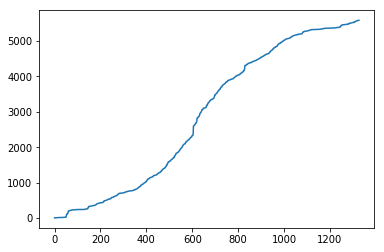

In [24]:
plt.plot(df.cummBugs.values)

In [134]:
from scipy import optimize
from functools import reduce
B = 1000
N = df.shape[0]
block_size = 20
n_blocks = int(np.ceil(N / 20))
def logistic(x, L, x0, k):
    return L / (1 + np.exp(-k*(x - x0)))

blocks = np.array_split(df.bugsPerDay.values, n_blocks)
coef = np.zeros((B, 3))
for i in range(B):
    bootstrap_indeces = np.sort(np.random.randint(0, n_blocks, n_blocks))
    bootstrap_samples = [blocks[index].tolist() for index in bootstrap_indeces]
    bootstrap_samples = reduce(lambda x,y: x+y,bootstrap_samples)
    bootstrap_samples = list(itertools.accumulate(bootstrap_samples))
    coef[i], _ = optimize.curve_fit(logistic, np.arange(len(bootstrap_samples)), bootstrap_samples)

C:\Users\nprok\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


In [135]:
mean_coef = np.mean(coef,axis=0)
lb = np.percentile(coef, 0.05, axis = 0)
ub = np.percentile(coef, 0.95, axis = 0)
print("Coef L (%f , %f)" % (lb[0] , ub[0]))
print("Coef x0 (%f , %f)" % (lb[1] , ub[1]))
print("Coef k (%f , %f)" % (lb[2] , ub[2]))

Coef L (4001.661863 , 4214.244346)
Coef x0 (490.469110 , 516.878390)
Coef k (0.003914 , 0.004513)


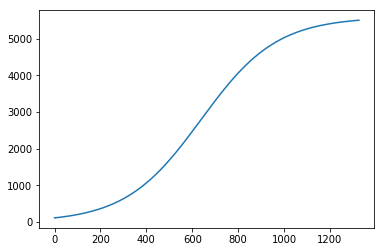

In [136]:
def bootstrap_fn(x):
    return mean_coef[0] / (1 + np.exp(-mean_coef[2]*(x - mean_coef[1])))
    
plt.plot(bootstrap_fn(np.arange(N)))